In [144]:
import pandas as pd

# read the data from the csv file
df = pd.read_csv('Respuestas.csv', encoding='Latin-1')
df.head()

,Sexo,Grupo,Experiencia,Pregunta 1,Preguntas 2,Pregunta 3,Pregunta 4,Pregunta 5
0,Mujer,Alumno,Media,Que documentación necesito para solicitar la a...,Donde debo apuntarme para recibir información ...,Cuanto tiempo de permanencia me exige el cambi...,Cuantos puntos necesito para aprobar la perman...,Como puedo convalidar mis estudios militares a...
1,Hombre,Alumno,Ninguna,¿En que especialidad del cambio de especialida...,¿Se hacen guardias en la academia?,¿Se puede ser externado en la academia?,¿Hay control nocturno en la academia?,¿Se pagan las comidas en la academia?
2,Hombre,Administración,Poca,Como solicitar transporte con medios de la ACLOG?,Como solicitar autobuses civiles para transpor...,Como iniciar un expediente de baja de material?,Como pasar revista de armas particulares?,Como solicitar material no reglamentario MATNO...
3,Hombre,Alumno,Poca,¿Qué material/equipo/uniforme debo de llevar a...,¿Qué cuadro de mandos/jefes voy a tener cuando...,"Ante cualquier duda, ¿A quién debo dirigirme?",¿Cuándo puedo presentar el pasaporte/dietas?,¿Qué documentación/fotocopias debo tener a man...
4,Hombre,Alumno,Poca,Que TTS se estudian en la Academia de logística,Que asignatura tiene cada TTS,Cuantas horas tiene cada TTS,"Servicios que tiene la academia. Por ejemplo, ...",Cómo llegar a la academia y que hay cerca de e...


In [172]:
antropometria = df[['Sexo', 'Grupo', 'Experiencia']]
antropometria.head()

,Sexo,Grupo,Experiencia
0,Mujer,Alumno,Media
1,Hombre,Alumno,Ninguna
2,Hombre,Administración,Poca
3,Hombre,Alumno,Poca
4,Hombre,Alumno,Poca


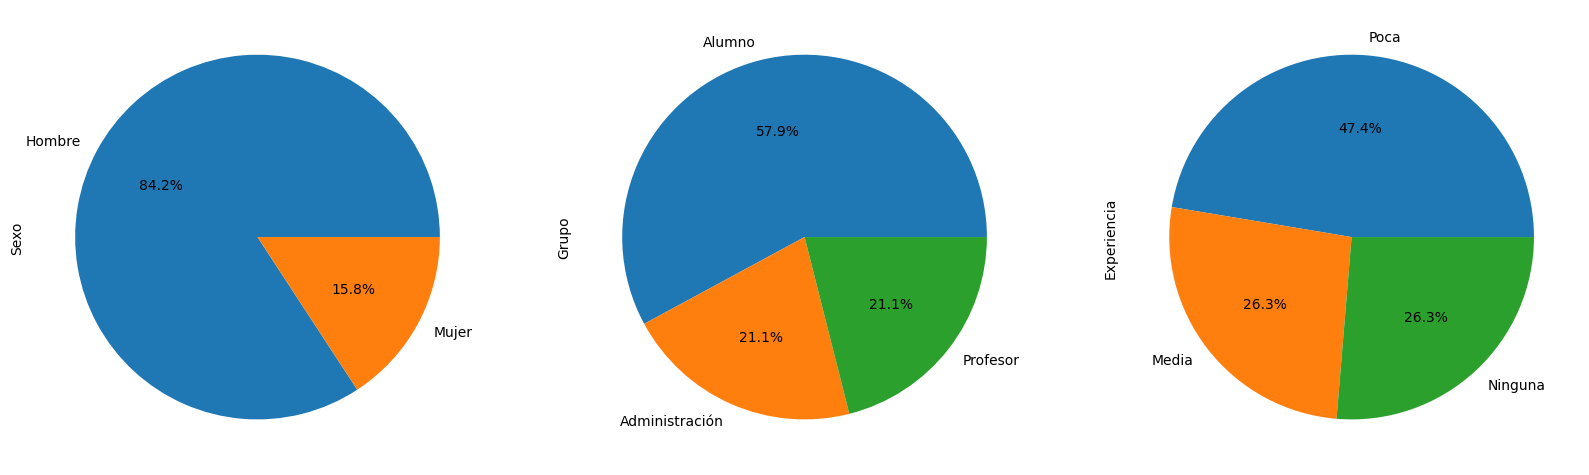

In [189]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 3, figsize=(10, 5))
for index, column in enumerate(antropometria.columns):
    antropometria[column].value_counts().plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%', ax=fig[index])

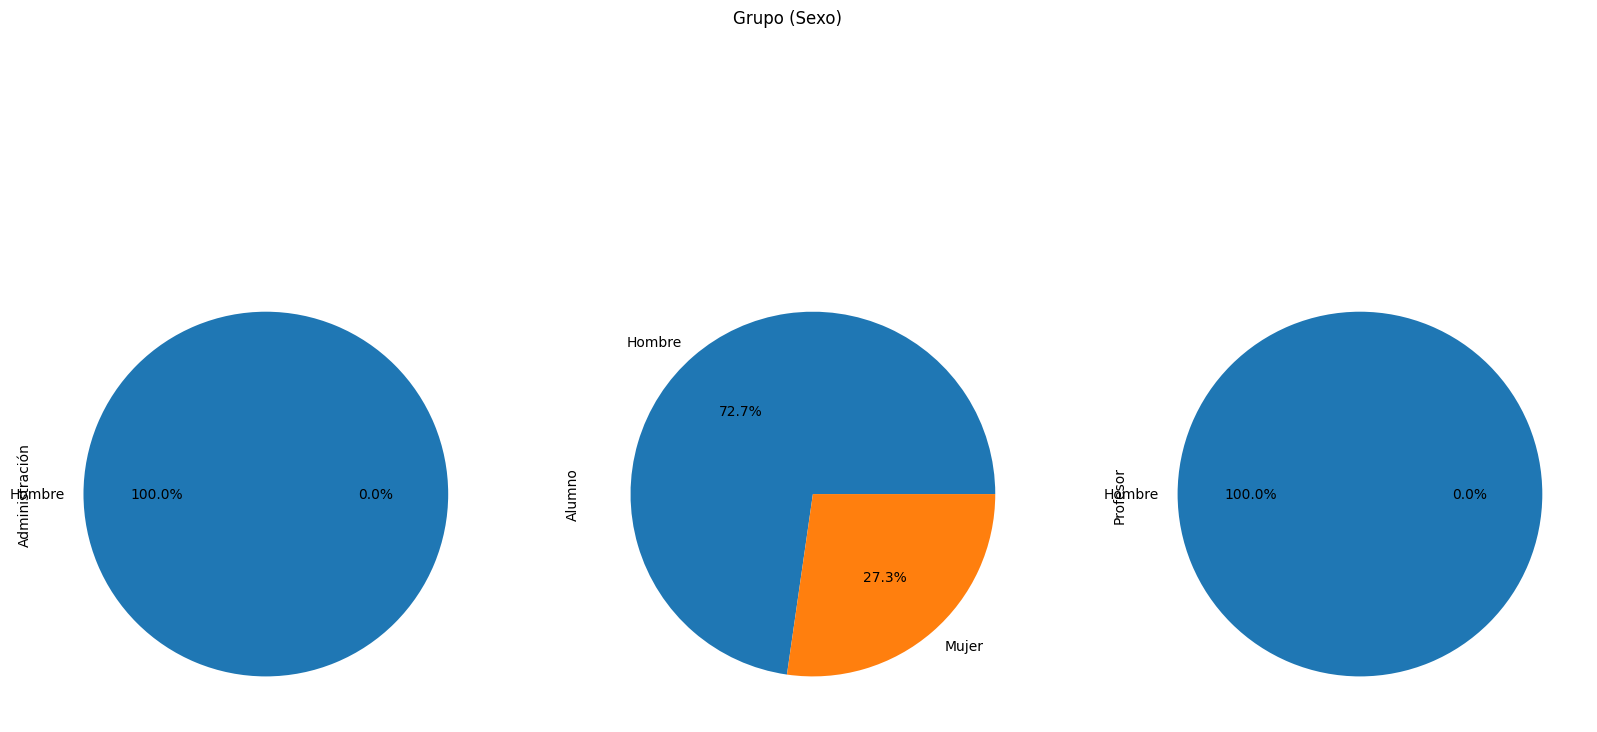

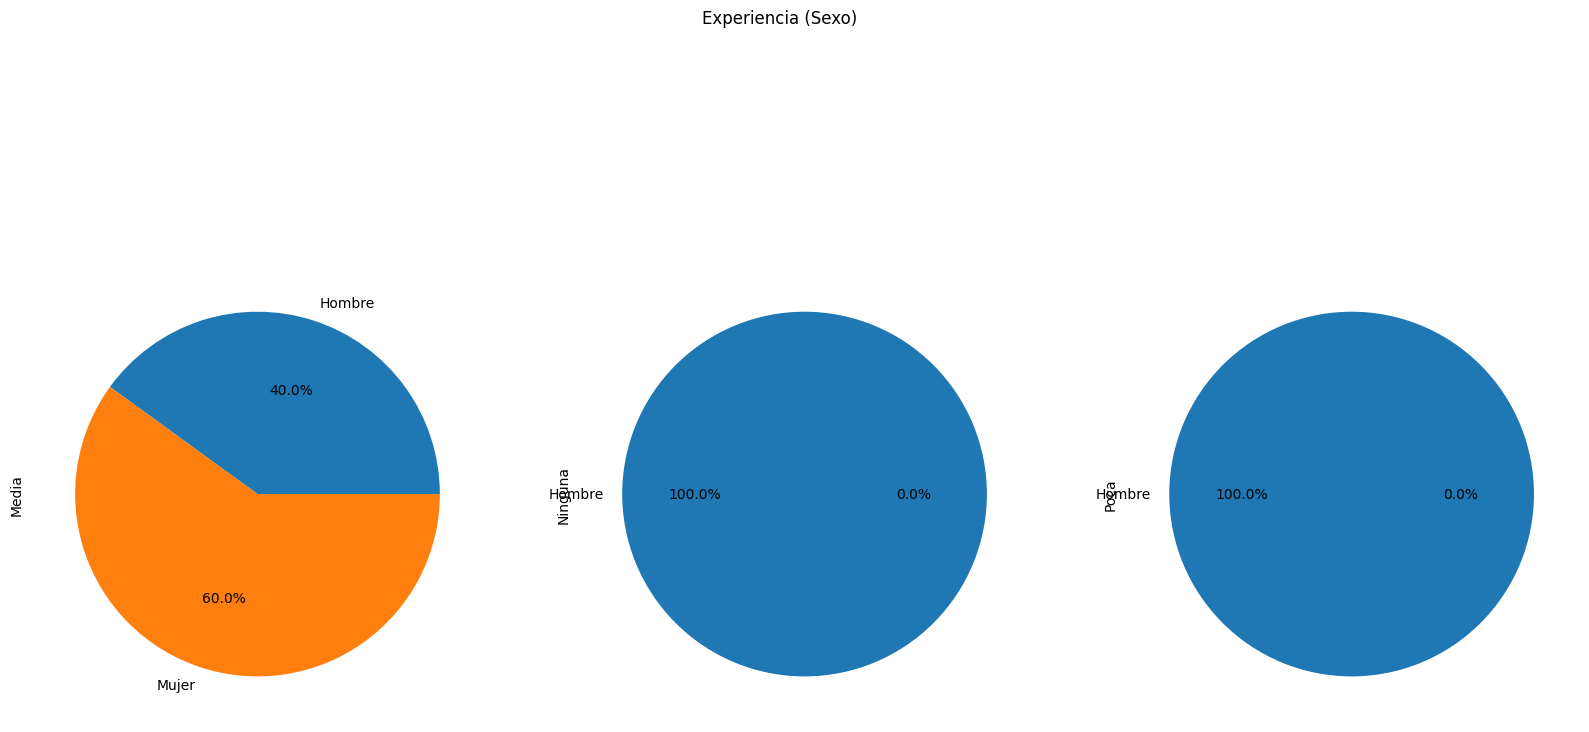

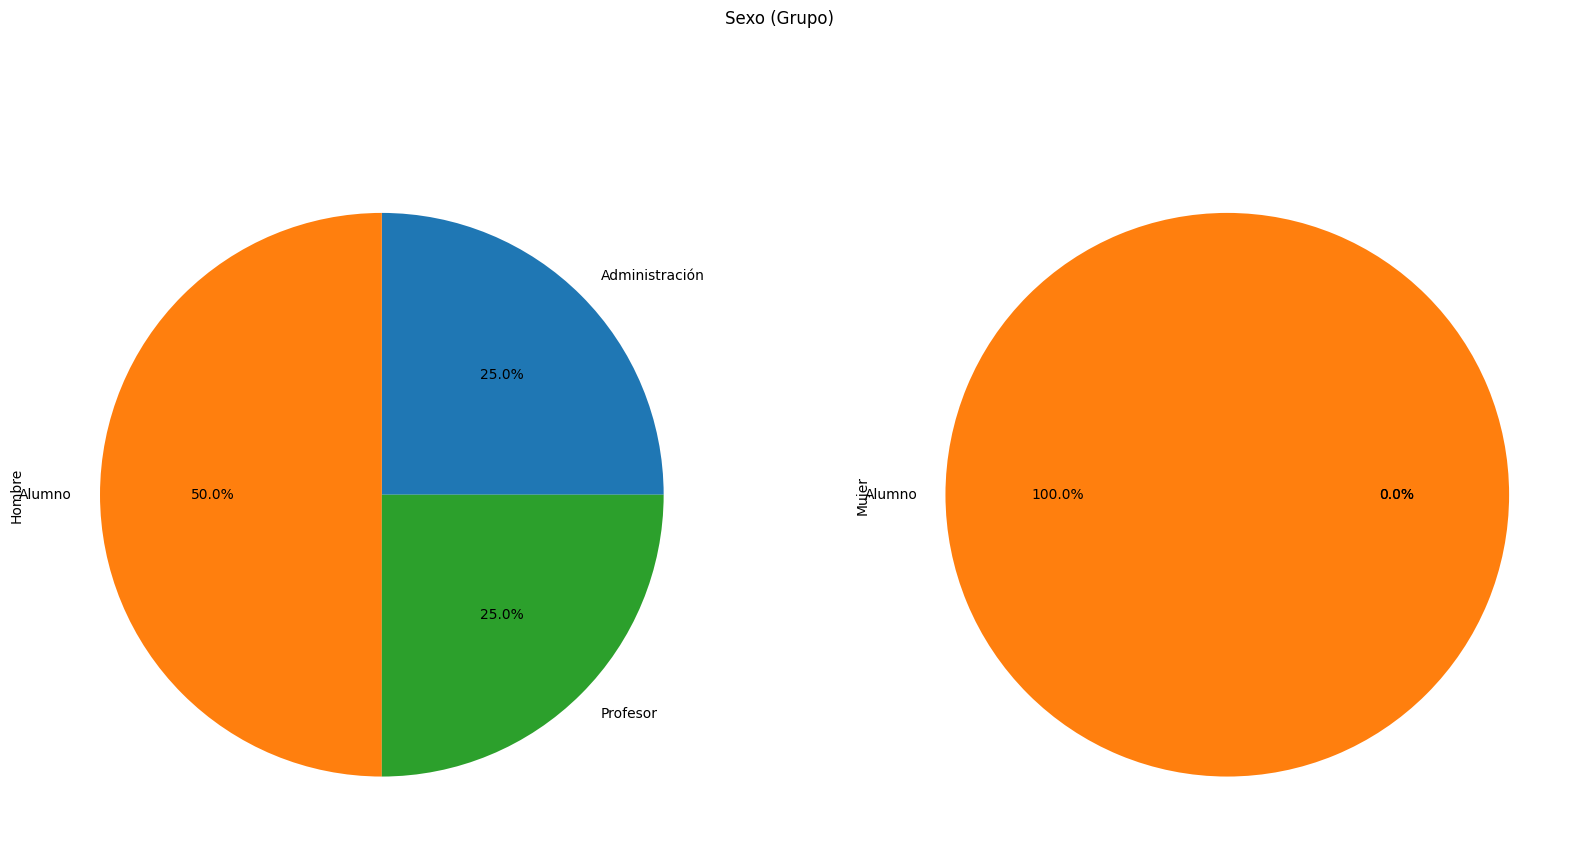

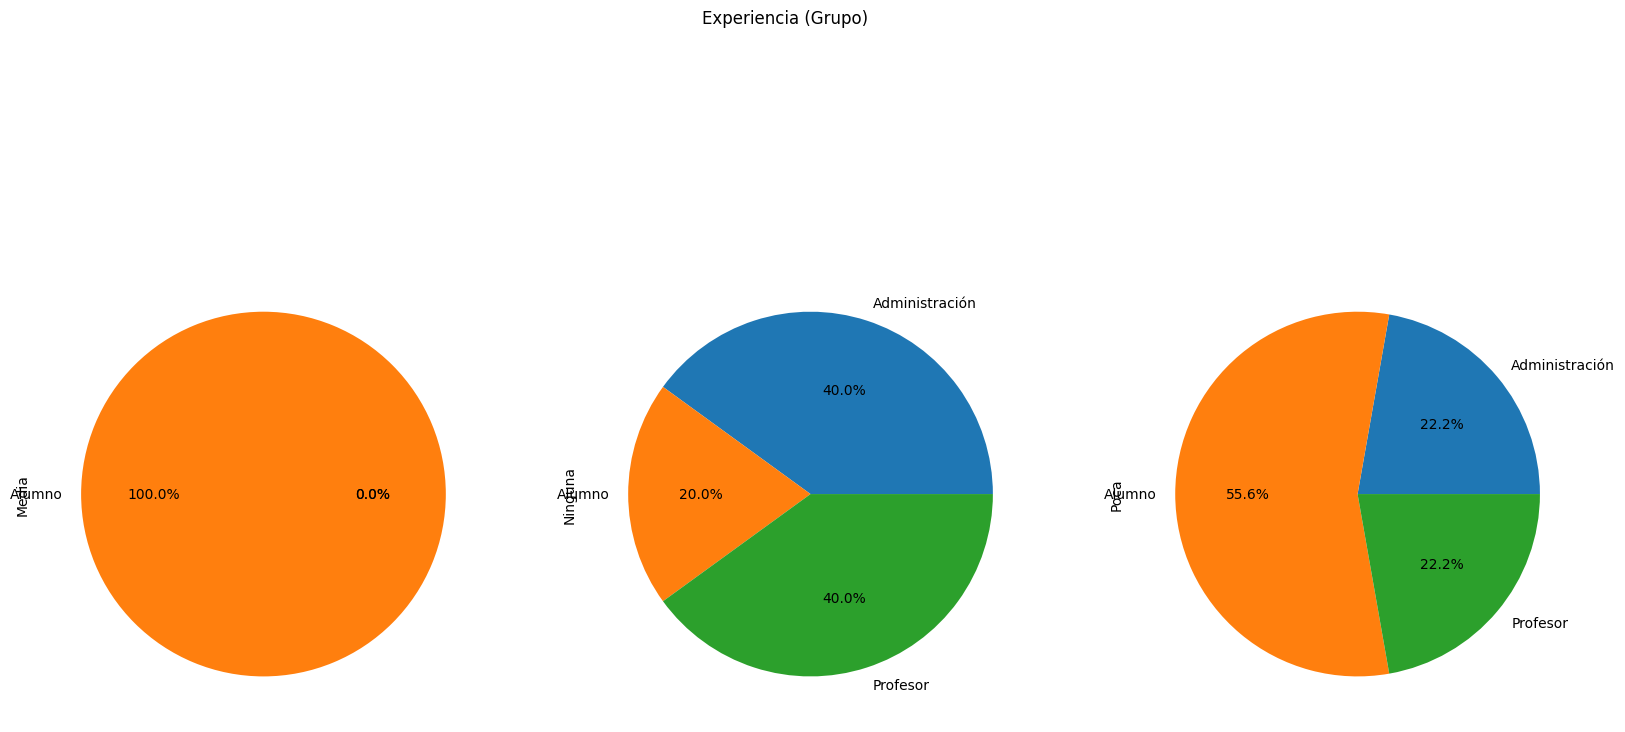

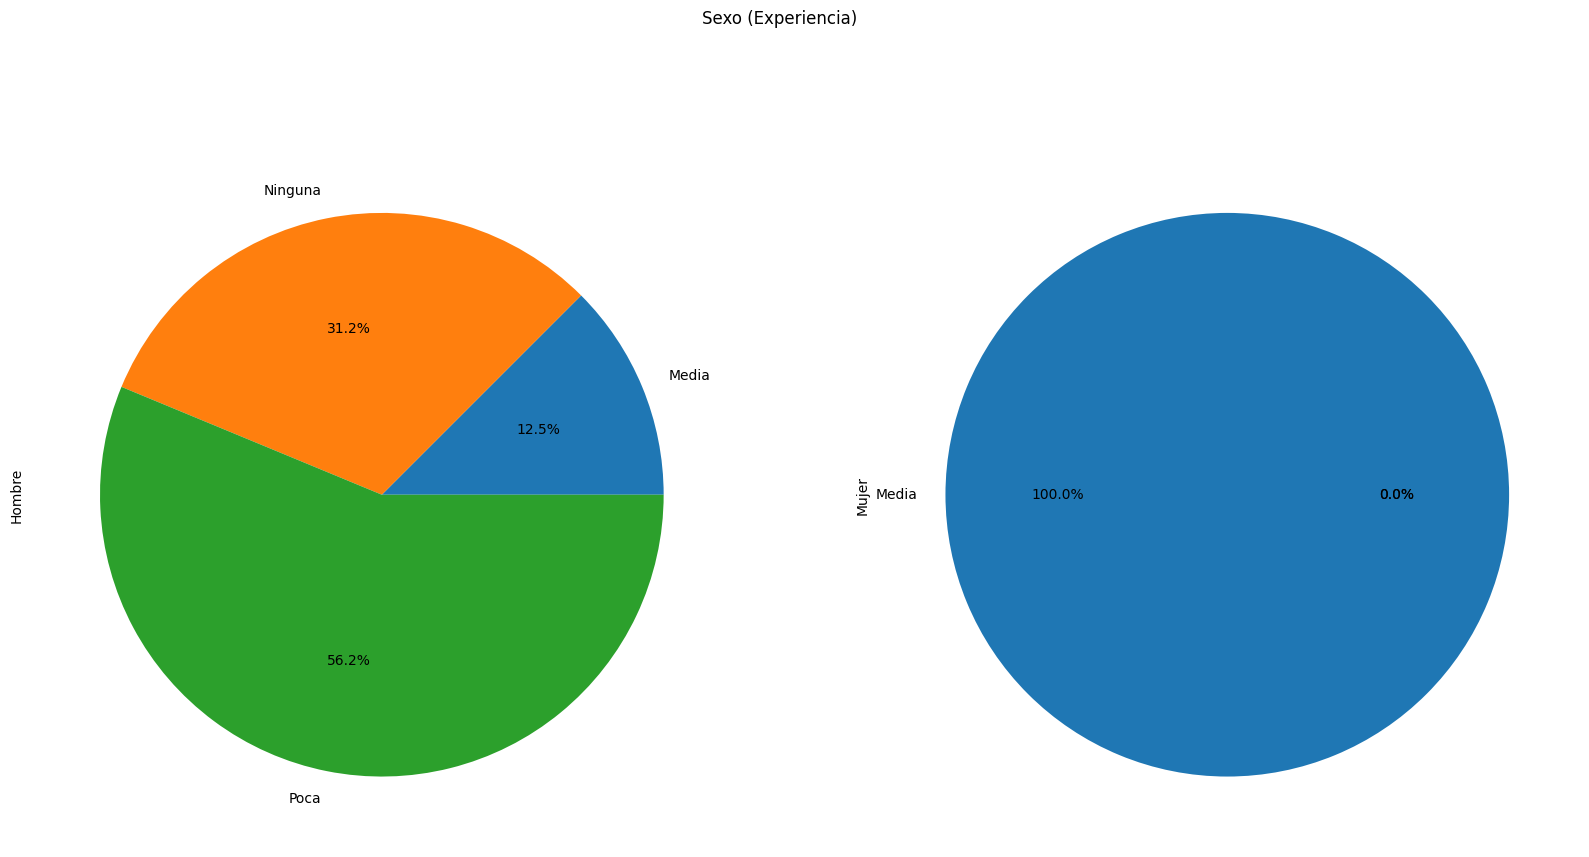

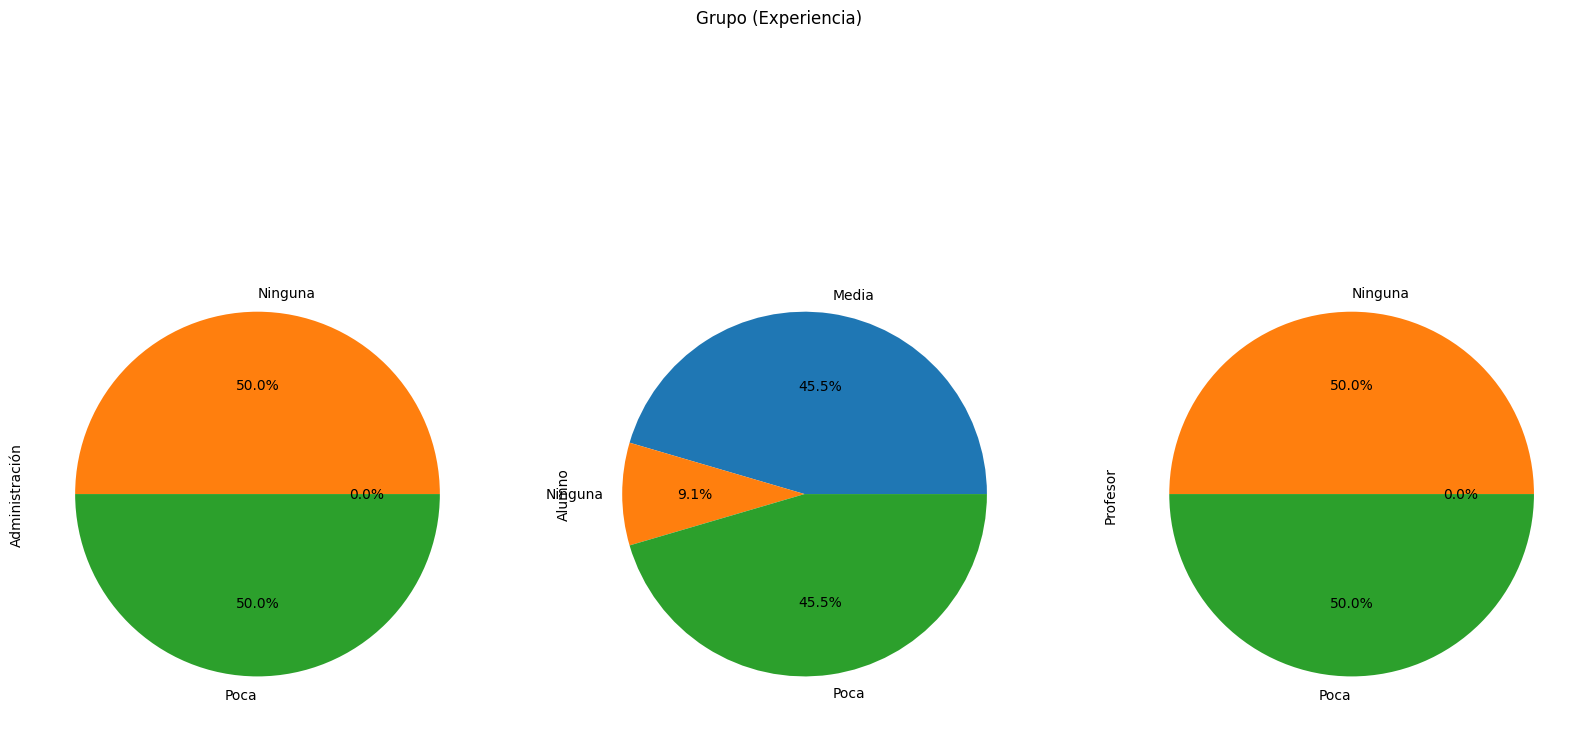

In [207]:
for index_x in range(len(antropometria.columns)):
    for index_y in range(len(antropometria.columns)):
        if index_x == index_y:
            continue
        column_x=antropometria.columns[index_x]
        column_y=antropometria.columns[index_y]
        antropometria[[column_x, column_y]].pivot_table(index=column_x, columns=column_y, aggfunc='size').plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%', subplots=True, title=f'{column_y} ({column_x})', legend=False)

In [145]:
preguntas = df.melt(id_vars=['Sexo', 'Grupo', 'Experiencia'], var_name='Pregunta id', value_name='Pregunta')
preguntas.drop('Pregunta id', axis=1, inplace=True)
preguntas['Pregunta'] = [pregunta.strip() for pregunta in preguntas['Pregunta']]
preguntas.head()

,Sexo,Grupo,Experiencia,Pregunta
0,Mujer,Alumno,Media,Que documentación necesito para solicitar la a...
1,Hombre,Alumno,Ninguna,¿En que especialidad del cambio de especialida...
2,Hombre,Administración,Poca,Como solicitar transporte con medios de la ACLOG?
3,Hombre,Alumno,Poca,¿Qué material/equipo/uniforme debo de llevar a...
4,Hombre,Alumno,Poca,Que TTS se estudian en la Academia de logística


In [146]:
#load file mainIdea.text 
with open('mainIdea.txt', 'r', encoding='utf-8') as file:
    mainIdea = file.readlines()
mainIdea = mainIdea[1:]
mainIdea = [line[:-1].replace('"', '') for line in mainIdea]
mainIdea[:5]

['\tRégimen interior',
 '\t\t¿Hay control nocturno en la academia?',
 '\t\t¿Cuales son las funciones del sargento de cuartel?',
 '\t\t¿Cuales son las funciones para los alumnos en el servicio de guardia de seguridad?',
 '\t\tPreguntas (muchas) acerca de las normas de régimen interior.']

In [147]:
import pandas as pd

df_categorias = pd.DataFrame()
categoria = ''
for line in mainIdea:
    if line[1] == '\t':
        df_categorias = pd.concat([
            df_categorias,
            pd.DataFrame([{'Categoria': categoria, 'Pregunta': line[2:].strip()}], index=[len(df_categorias)])
        ])
    else:
        categoria = line[1:]
df_categorias.head()

,Categoria,Pregunta
0,Régimen interior,¿Hay control nocturno en la academia?
1,Régimen interior,¿Cuales son las funciones del sargento de cuar...
2,Régimen interior,¿Cuales son las funciones para los alumnos en ...
3,Régimen interior,Preguntas (muchas) acerca de las normas de rég...
4,Régimen interior,¿Se hacen guardias en la academia?


In [148]:
preguntas = pd.merge(preguntas, df_categorias, on='Pregunta', how='left')
preguntas.head()

,Sexo,Grupo,Experiencia,Pregunta,Categoria
0,Mujer,Alumno,Media,Que documentación necesito para solicitar la a...,Procedimientos/Normativa
1,Hombre,Alumno,Ninguna,¿En que especialidad del cambio de especialida...,Estudios
2,Hombre,Administración,Poca,Como solicitar transporte con medios de la ACLOG?,Procedimientos/Normativa
3,Hombre,Alumno,Poca,¿Qué material/equipo/uniforme debo de llevar a...,Acogida
4,Hombre,Alumno,Poca,Que TTS se estudian en la Academia de logística,Estudios


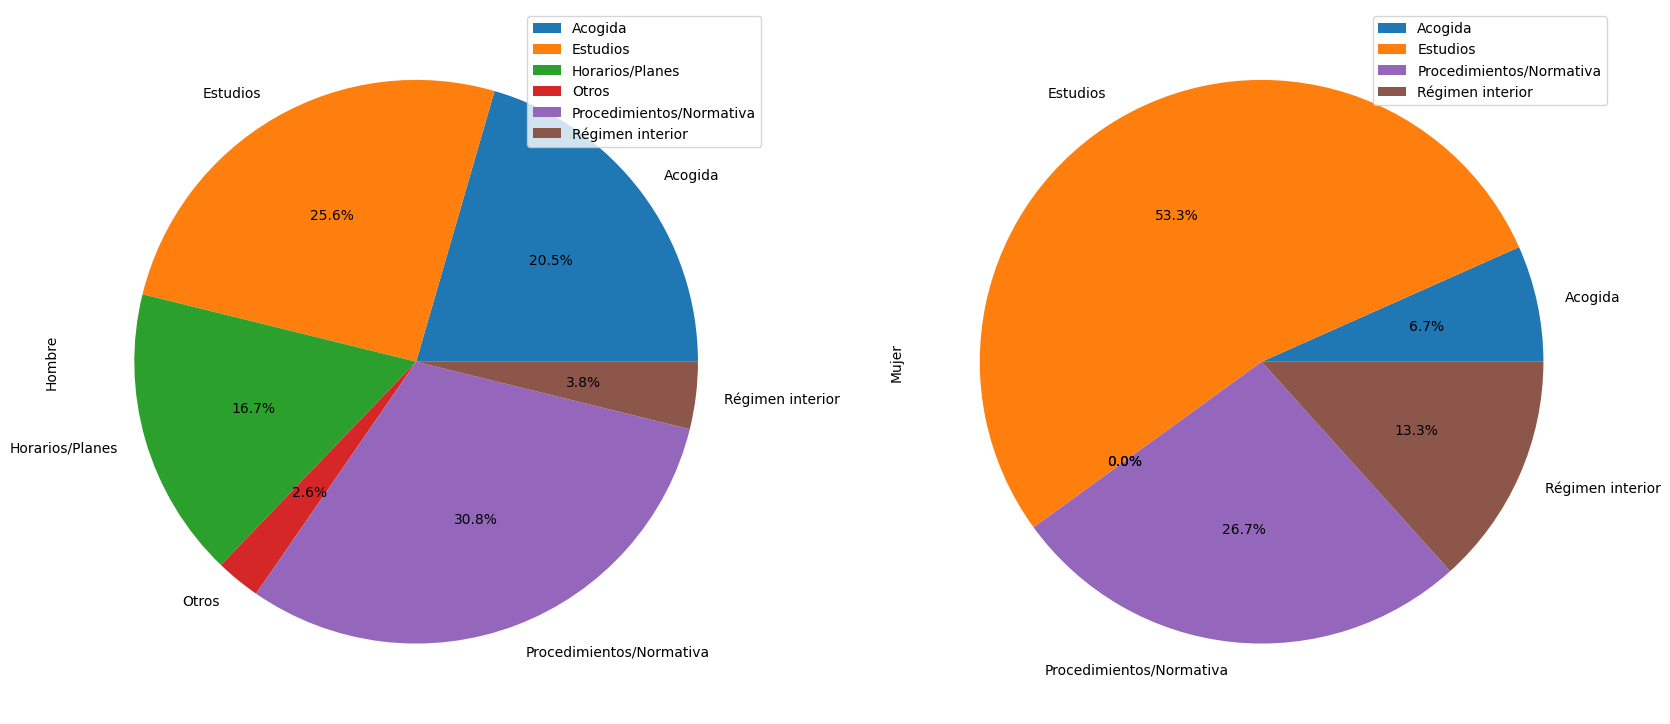

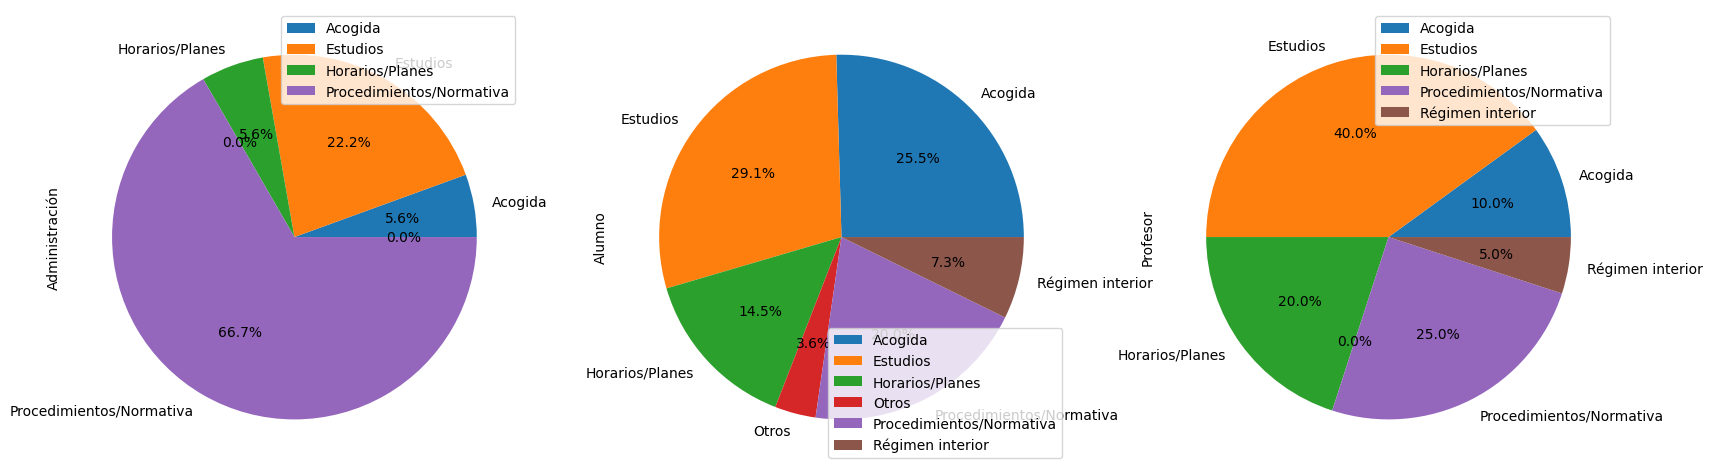

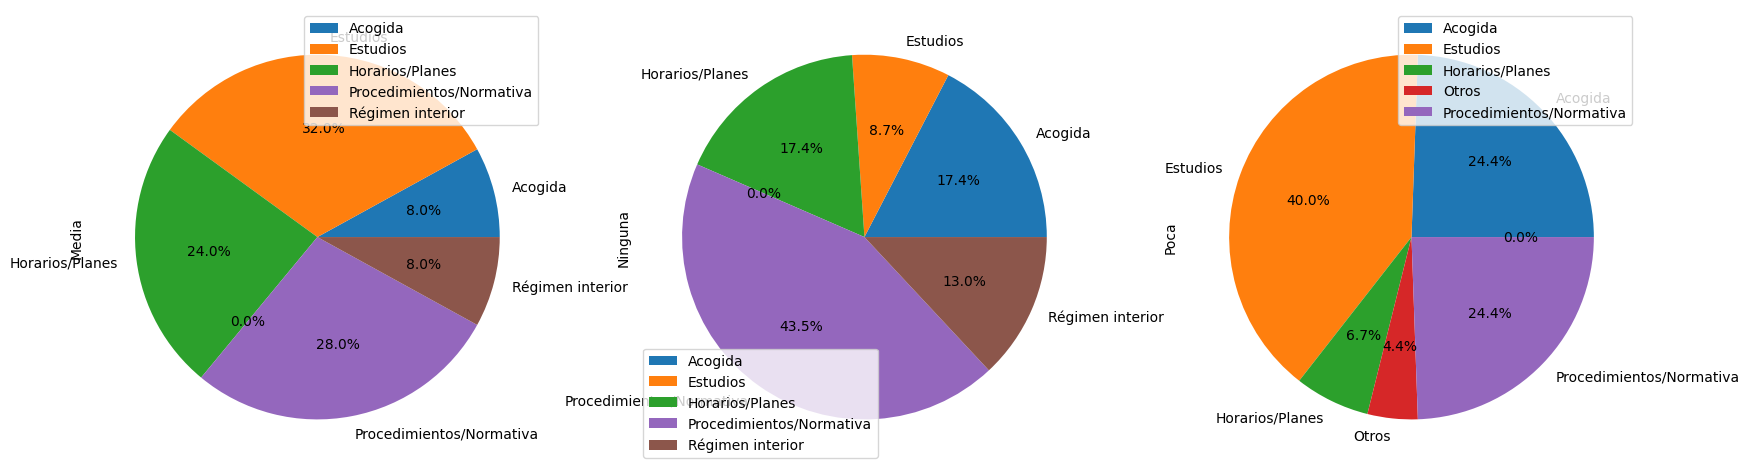

In [161]:
for column in ['Sexo', 'Grupo', 'Experiencia']:
    pt = preguntas.pivot_table(index='Categoria', columns=column, aggfunc='count', values='Pregunta')
    pt.plot(kind='pie', subplots=True, figsize=(20, 20), autopct='%1.1f%%')